In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def get_dotproduct(v1, v2):
    return sum((a * b) for a, b in zip(v1, v2))

def get_length(v):
    return math.sqrt(get_dotproduct(v, v))

def get_angle(v1, v2):
    return (get_dotproduct(v1, v2) / (get_length(v1) * get_length(v2)))

def points_distance(a, b):
    sum = 0
    for x in (b - a):
        sum += x ** 2
    return math.sqrt(sum)

def norm_val(val):
    sum = 0
    for x in val:
        sum += x**2
    return math.sqrt(sum)


def get_crossproduct(arr):
    temp = []
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            temp.append([i + 1, j + 1, np.cross(arr[i], arr[j])])
    temp = np.array(temp, dtype='object')
    return temp

def angle_planarity(temp):
    trash = {}
    for i in range(len(temp)):
        for j in range(i + 1, len(temp)):
            a = ''.join([str(temp[i][0]), ',', str(temp[i][1]), '->', str(temp[j][0]), ',', str(temp[j][1])])
            trash[a] = get_angle(temp[i][2], temp[j][2])
    return trash

def plane_planarity(planes):
    is_flat = True
    for i in planes.values():
        if (abs(i) < 0.97):
            is_flat = False
            return is_flat
    return is_flat

def angle_fix(conf_angle_matrix):
    thresh = 6
    is_consistent = True
    is_first_angle = True
    first_angle = -9
    for i in conf_angle_matrix:
        for j in i:
            for k in j:
                if (k != -9):
                    if is_first_angle:
                        first_angle = k
                        is_first_angle = False
                    if abs(k - first_angle) > thresh:
                        is_consistent = False
                        return is_consistent
    return is_consistent

def is_distance_consistent(conf_distance_matrix):
    thresh = 0.1
    is_consistent = True
    is_first_distance = True
    first_distance = -9
    for i in conf_distance_matrix:
        for j in i:
            if j != -9:
                if is_first_distance:
                    first_distance = j
                    is_first_distance = False
                if (abs(j - first_distance) > thresh):
                    is_consistent = False
                    return is_consistent
    return is_consistent


def points_distance(a, b):
    sum = 0
    for x in (b - a):
        sum += x ** 2
    return math.sqrt(sum)


def init_random_points(n_points, n_dimensions):
    v = np.random.randn(n_points, n_dimensions)
    v = np.array(v)
    for i in range(len(v)): v[i] = v[i] / get_length(v[i])
    return v

def find_total_dist_sum(array):
    summation = 0
    for i in range(len(array)):
        for j in range(i + 1, len(array)):
            summation += points_distance(array[i], array[j])
    return summation

In [20]:
def angle_vs_distance_reg(points):
    dconf_angle_matrix = [[-9.0]] * (len(points) * len(points) * len(points))
    dconf_dist_matrix = [-9.0] * (len(points) * len(points))
    dconf_angle_matrix = np.array(dconf_angle_matrix).reshape((len(points), len(points), len(points)))
    dconf_dist_matrix = np.array(dconf_dist_matrix).reshape((len(points), len(points)))

    is_distance_cal = False
    points = np.array(points)
    for i in range(len(points)):
        for j in range(len(points)):
            for k in range(j + 1, len(points)):
                if (i != j and i != k):
                    vector_1 = points[j] - points[i]
                    vector_2 = points[k] - points[i]
                    dconf_angle_matrix[i][j][k] = math.degrees(math.acos(get_angle(vector_1, vector_2)))

                if not is_distance_cal:
                    dconf_dist_matrix[j][k] = points_distance(points[j], points[k])
        is_distance_cal = True

    return [dconf_angle_matrix, dconf_dist_matrix, angle_fix(dconf_angle_matrix)]

In [7]:
def graph_3D(arr):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111, projection='3d')

    # arr = [[-1., 0., 0.],
    #        [0.94420136, 0., -0.32974807],
    #        [0.01900962, 0., 0.99994432],
    #        [0.01839451, -0.94213634, -0.33509812],
    #        [0.01839451, 0.94213634, -0.33509812]]

    for i in range(len(arr)):
        ax.scatter(arr[i][0], arr[i][1], arr[i][2])
        for j in range(i + 1, len(arr)):
            ax.plot([arr[i][0], arr[j][0]], [arr[i][1], arr[j][1]], [arr[i][2], arr[j][2]])

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 1 * np.outer(np.cos(u), np.sin(v))
    y = 1 * np.outer(np.sin(u), np.sin(v))
    z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b', linewidth=0, alpha=0.2)
    plt.show()

# Q3

In [8]:
initial_beta = 10
alpha = 0.0001
iterations = 20000
beta_iterations = 50

In [9]:
def gradient_descent(arr):
    beta = initial_beta
    arr = np.array(arr)

    # temp[0] = array[0]
    for iter in range(beta_iterations):
        for iteration in range(iterations):

            column_sum = [0] * len(arr[0])  #

            for i in range(0, len(arr)):
                for j in range(0, len(arr[0])):
                    column_sum[j] += arr[i][j]

            square_sum = [0] * len(arr)
            for i in range(1, len(arr)):
                square_sum[i] = np.sum(np.square(arr[i])) - 1

            temp = np.zeros((len(arr), len(arr[0])))

            for i in range(1, len(arr)):
                beta_val_added = False
                norm_value_i = norm_val(arr[i])
                for j in range(len(arr)):
                    #             updating (i,j)
                    if(i!=j):
                        distance = points_distance(arr[i],arr[j])
                        temp[i] -= np.multiply(arr[i] - arr[j] , 1/distance)
                        if not beta_val_added:
                            p = float(beta*(1 - (1/norm_value_i)))
                            temp[i] += np.multiply( arr[i] ,p )
                            beta_val_added = True

            arr = arr - np.multiply(temp, alpha)  # update of array
            # beta += 1

        print(arr, iter, " ", find_total_dist_sum(arr), square_sum)
        beta += 20
    return arr


# Q4

In [36]:

arr = [[1, 0, 0]]
n_points = 2  # number of  additional points needed
n_dimensions = len(arr[0])
# n_dimensions = 4

v = init_random_points(n_points, n_dimensions)
for x in range(len(v)): arr.insert(x + 1, v[x])
arr = np.array(arr)
print(arr)

[[ 1.          0.          0.        ]
 [-0.19472769  0.93133981  0.30771299]
 [-0.88199779 -0.11099908 -0.45799465]]


In [37]:
output = gradient_descent(arr)

[[ 1.          0.          0.        ]
 [-0.30579534  0.96383539  0.5876548 ]
 [-0.8121377  -0.67924245 -0.52203291]] 0   5.776863957350361 [0, 0.3678268815277794, 0.39345637647565246]
[[ 1.          0.          0.        ]
 [-0.41050919  0.81213482  0.53804116]
 [-0.61906762 -0.71056694 -0.48298595]] 1   5.392300826873667 [0, 0.11756896799695937, 0.12142558604176701]
[[ 1.          0.          0.        ]
 [-0.46533133  0.76781759  0.51397236]
 [-0.55514483 -0.72529229 -0.48684935]] 2   5.315748322643197 [0, 0.07024466029153742, 0.07125699705990662]
[[ 1.          0.          0.        ]
 [-0.48852753  0.74828498  0.50148957]
 [-0.52718996 -0.73003526 -0.48940167]] 3   5.282013675308227 [0, 0.05008133925692526, 0.05039474334526206]
[[ 1.          0.          0.        ]
 [-0.49796258  0.73874398  0.4951588 ]
 [-0.5145608  -0.73089587 -0.48991335]] 4   5.262994417627894 [0, 0.038891637564863135, 0.03899669044658416]
[[ 1.          0.          0.        ]
 [-0.50161261  0.73369729  0.49

In [38]:
for out in output:
    print(np.sum(np.square(out)))
print(output)
print(find_total_dist_sum(output))

1.0
1.0035028347338883
1.0035028347338883
[[ 1.          0.          0.        ]
 [-0.50058241  0.72077338  0.48312092]
 [-0.50058241 -0.72077338 -0.48312092]]
5.2022147957158005


In [39]:
cross_product_vectors = get_crossproduct(output)
cross_product_angels = angle_planarity(cross_product_vectors)
print("planar angles are",cross_product_angels )

planar angles are {'1,2->1,3': -0.9999999999999999, '1,2->2,3': 1.0, '1,3->2,3': -1.0}


In [40]:
print("The  given point configuration is a plane:", plane_planarity(cross_product_angels))

The  given point configuration is a plane: True


## 6Q. Distance and angles for 3 point 3 configuration

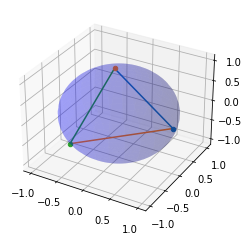

In [41]:
graph_3D(output)

In [42]:

# regularity needs to be verified
# add distance to regularity

[angle_matrix, distance_matrix, regularity] = angle_vs_distance_reg(output)
print("--------------------------------------------------------------------")
print("The Angle Matrix is")
print(angle_matrix)
print("--------------------------------------------------------------------")
print("The Distance Matrix is")
print(distance_matrix)
print("--------------------------------------------------------------------")
print("The point d configuration is regular: ", regularity)


--------------------------------------------------------------------
The Angle Matrix is
[[[-9.         -9.         -9.        ]
  [-9.         -9.         60.07717585]
  [-9.         -9.         -9.        ]]

 [[-9.         -9.         59.96141207]
  [-9.         -9.         -9.        ]
  [-9.         -9.         -9.        ]]

 [[-9.         59.96141207 -9.        ]
  [-9.         -9.         -9.        ]
  [-9.         -9.         -9.        ]]]
--------------------------------------------------------------------
The Distance Matrix is
[[-9.          1.73339772  1.73339772]
 [-9.         -9.          1.73541936]
 [-9.         -9.         -9.        ]]
--------------------------------------------------------------------
The point d configuration is regular:  True


# Q5

In [22]:

arr = [[1, 0, 0]]
n_points = 3  # number of  additional points needed
n_dimensions = len(arr[0])
# n_dimensions = 4

v = init_random_points(n_points, n_dimensions)
for x in range(len(v)): arr.insert(x + 1, v[x])
arr = np.array(arr)
print(arr)

[[ 1.          0.          0.        ]
 [ 0.76746546 -0.201941   -0.60845427]
 [-0.33424487 -0.94131022 -0.04706837]
 [ 0.4420943  -0.72126029  0.53323187]]


In [23]:
output = gradient_descent(arr)

[[ 1.          0.          0.        ]
 [ 0.14669684  0.59556988 -1.08954278]
 [-1.15550853 -0.43918982 -0.16625401]
 [-0.01059413 -0.25170997  1.22381444]] 0   11.501277905190278 [0, 0.563327276993318, 0.5557285339261531, 0.5611916080992365]
[[ 1.          0.          0.        ]
 [-0.0170462   0.6243843  -0.88285881]
 [-0.94877012 -0.48209951 -0.19294213]
 [-0.07121373 -0.09236838  1.07550788]] 1   10.301654778762606 [0, 0.16958598054141039, 0.16981131197934451, 0.1703205028726893]
[[ 1.          0.          0.        ]
 [-0.10027512  0.68395052 -0.78882979]
 [-0.79998195 -0.63481155 -0.24017089]
 [-0.12308049  0.00799901  1.04167004]] 2   10.099988284015085 [0, 0.10009583524466681, 0.10063885805292738, 0.10028926211403877]
[[ 1.          0.          0.        ]
 [-0.17986737  0.72519625 -0.7161355 ]
 [-0.64717796 -0.75721191 -0.28177872]
 [-0.18962886  0.0839719   1.01397753]] 3   10.029357118256513 [0, 0.07111192124380272, 0.07160842725324024, 0.0711608201737759]
[[ 1.          0. 

In [24]:
for out in output:
    print(np.sum(np.square(out)))
print(output)
print(find_total_dist_sum(output))

1.0
1.0049558120834876
1.0049558120834874
1.0049558120834874
[[ 1.          0.          0.        ]
 [-0.33382758  0.72764938 -0.60335839]
 [-0.33382758 -0.88634838 -0.32848365]
 [-0.33382758  0.158699    0.93184204]]
9.816147531702295


In [29]:
cross_product_vectors = get_crossproduct(output)
cross_product_angels = angle_planarity(cross_product_vectors)
print("planar angles are: ")
for x in cross_product_angels.items():
    print(x)


planar angles are: 
('1,2->1,3', -0.49999999999999883)
('1,2->1,4', -0.5000000000000038)
('1,2->2,3', 0.49962874618173675)
('1,2->2,4', 0.49962874618171305)
('1,2->3,4', 1.903052294490773e-14)
('1,3->1,4', -0.4999999999999974)
('1,3->2,3', -0.4996287461817185)
('1,3->2,4', -1.3637508299282692e-15)
('1,3->3,4', 0.499628746181719)
('1,4->2,3', -2.0425268111879827e-14)
('1,4->2,4', -0.49962874618171216)
('1,4->3,4', -0.4996287461817365)
('2,3->2,4', -0.500742231977755)
('2,3->3,4', 0.5007422319777672)
('2,4->3,4', -0.5007422319777561)


In [31]:
print("The  given point configuration is a plane:", plane_planarity(cross_product_angels))

The  given point configuration is a plane: False


## Q6. Distance and angles, shape of the 4 point 3 configuration

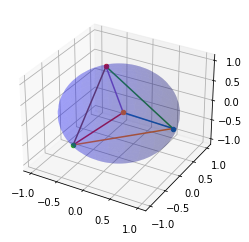

In [30]:
graph_3D(output)

In [34]:

# regularity needs to be verified
# add distance to regularity

[angle_matrix, distance_matrix, regularity] = angle_vs_distance_reg(output)
print("--------------------------------------------------------------------")
print("The Angle Matrix is")
print(angle_matrix)
print("--------------------------------------------------------------------")
print("The Distance Matrix is")
print(distance_matrix)
print("--------------------------------------------------------------------")
print("The point d configuration is regular: ", regularity)


--------------------------------------------------------------------
The Angle Matrix is
[[[-9.         -9.         -9.         -9.        ]
  [-9.         -9.         60.09815171 60.09815171]
  [-9.         -9.         -9.         60.09815171]
  [-9.         -9.         -9.         -9.        ]]

 [[-9.         -9.         59.95092414 59.95092414]
  [-9.         -9.         -9.         -9.        ]
  [-9.         -9.         -9.         60.        ]
  [-9.         -9.         -9.         -9.        ]]

 [[-9.         59.95092414 -9.         59.95092414]
  [-9.         -9.         -9.         60.        ]
  [-9.         -9.         -9.         -9.        ]
  [-9.         -9.         -9.         -9.        ]]

 [[-9.         59.95092414 59.95092414 -9.        ]
  [-9.         -9.         60.         -9.        ]
  [-9.         -9.         -9.         -9.        ]
  [-9.         -9.         -9.         -9.        ]]]
--------------------------------------------------------------------
Th

# Q6

### refer to the above codes

In [43]:

arr = [[1, 0, 0]]
n_points = 4  # number of  additional points needed
n_dimensions = len(arr[0])
# n_dimensions = 4

v = init_random_points(n_points, n_dimensions)
for x in range(len(v)): arr.insert(x + 1, v[x])
arr = np.array(arr)
print(arr)

[[ 1.          0.          0.        ]
 [-0.70839732 -0.55454544  0.43663784]
 [-0.44901368 -0.85540133  0.25821556]
 [ 0.40960396  0.82208619  0.39547299]
 [-0.2981912   0.88449789  0.35881122]]


In [44]:
output = gradient_descent(arr)

[[ 1.          0.          0.        ]
 [-1.06131451 -0.59321871  0.50457375]
 [ 0.02600958 -1.23916378 -0.47279567]
 [ 0.74196723  1.05235176  0.28303196]
 [-0.82380238  0.99509613 -0.23521087]] 0   19.447049929967065 [0, 0.7328906017074712, 0.7597389941564319, 0.7380661666414232, 0.7241900565260839]
[[ 1.          0.          0.        ]
 [-0.72570004 -0.50656754  0.66314403]
 [ 0.05277626 -0.94162777 -0.57868673]
 [ 0.39158462  0.92097835  0.46621318]
 [-0.74602877  0.62920474 -0.51863413]] 1   16.94766625181077 [0, 0.22301118428935318, 0.22432659265954236, 0.21889421792198172, 0.22143877751708385]
[[ 1.          0.          0.        ]
 [-0.59905462 -0.49457543  0.72617675]
 [ 0.04642611 -0.86537922 -0.61595648]
 [ 0.20555014  0.88485418  0.55121919]
 [-0.67287707  0.5161352  -0.6413022 ]] 2   16.464252637985876 [0, 0.13080398138869054, 0.13043899650733404, 0.12906034064455296, 0.13042760635975803]
[[ 1.          0.          0.        ]
 [-0.54733472 -0.50151226  0.73575615]
 [ 0.0

In [45]:
for out in output:
    print(np.sum(np.square(out)))
print(output)
print(find_total_dist_sum(output))

1.0
1.006367707927658
1.006317859723155
1.006317859723155
1.0063677023826145
[[ 1.          0.          0.        ]
 [-0.50188172 -0.49546616  0.71343936]
 [ 0.00103197 -0.82394051 -0.5722227 ]
 [ 0.00103197  0.82395569  0.57220085]
 [-0.50192872  0.49545067 -0.71341706]]
15.721131332588207


In [46]:
cross_product_vectors = get_crossproduct(output)
cross_product_angels = angle_planarity(cross_product_vectors)
print("planar angles are: ")
for x in cross_product_angels.items():
    print(x)


planar angles are: 
('1,2->1,3', -1.3264865149455126e-05)
('1,2->1,4', -1.326486515117522e-05)
('1,2->1,5', -0.9999999999999999)
('1,2->2,3', -0.0008840912005899557)
('1,2->2,4', -0.0008840912005888762)
('1,2->2,5', 0.9999999999999999)
('1,2->3,4', -8.439449444294167e-16)
('1,2->3,5', -0.0008973365567961455)
('1,2->4,5', -0.0008973365567967804)
('1,3->1,4', -0.9999999996480867)
('1,3->1,5', 1.3264865152411158e-05)
('1,3->2,3', -0.5002911902998385)
('1,3->2,4', 0.5002912137545397)
('1,3->2,5', -1.3264865150982913e-05)
('1,3->3,4', -0.9999168763934855)
('1,3->3,5', 0.5003380514099053)
('1,3->4,5', -0.5003380276038083)
('1,4->1,5', 1.3264865148270061e-05)
('1,4->2,3', 0.5002912137545397)
('1,4->2,4', -0.5002911902998385)
('1,4->2,5', -1.326486514965012e-05)
('1,4->3,4', 0.9999168763934857)
('1,4->3,5', -0.5003380276038085)
('1,4->4,5', 0.5003380514099052)
('1,5->2,3', 0.0008840912005884906)
('1,5->2,4', 0.0008840912005903006)
('1,5->2,5', -1.0)
('1,5->3,4', -1.9893609929451572e-15)
('1,5-

In [47]:
print("The  given point configuration is a plane:", plane_planarity(cross_product_angels))

The  given point configuration is a plane: False


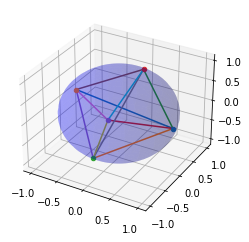

In [48]:
graph_3D(output)

In [49]:

# regularity needs to be verified
# add distance to regularity

[angle_matrix, distance_matrix, regularity] = angle_vs_distance_reg(output)
print("--------------------------------------------------------------------")
print("The Angle Matrix is")
print(angle_matrix)
print("--------------------------------------------------------------------")
print("The Distance Matrix is")
print(distance_matrix)
print("--------------------------------------------------------------------")
print("The point d configuration is regular: ", regularity)


--------------------------------------------------------------------
The Angle Matrix is
[[[-9.         -9.         -9.         -9.         -9.        ]
  [-9.         -9.         52.35101431 52.35101431 60.08411242]
  [-9.         -9.         -9.         90.23955091 52.34964026]
  [-9.         -9.         -9.         -9.         52.34964026]
  [-9.         -9.         -9.         -9.         -9.        ]]

 [[-9.         -9.         52.17614226 52.17614226 59.95871703]
  [-9.         -9.         -9.         -9.         -9.        ]
  [-9.         -9.         -9.         89.96839095 52.25851298]
  [-9.         -9.         -9.         -9.         52.25851298]
  [-9.         -9.         -9.         -9.         -9.        ]]

 [[-9.         75.47284343 -9.         44.88022455 75.47473739]
  [-9.         -9.         -9.         45.01580453 75.482126  ]
  [-9.         -9.         -9.         -9.         -9.        ]
  [-9.         -9.         -9.         -9.         45.01514846]
  [-9.     

# Q8

In [ ]:
# sill yet to be done

# Q9

In [50]:
def check_dimension():
    angle_matrices = []
    distance_matrices = []
    dimension = 4
    num_of_points = 1
    point_found = False
    point_value = None
    while not point_found:
        arr_input = []
        v = init_random_points(num_of_points, dimension)
        for x in range(len(v)):
            arr_input.insert(x + 1, v[x])
        arr_input = np.array(arr_input)
        output = gradient_descent(arr_input)
        [angle_matrix, distance_matrix, regularity] = angle_vs_distance_reg(output)
        angle_matrices.append(angle_matrix)
        distance_matrices.append(distance_matrix)
        rank = np.linalg.matrix_rank(output)
        if rank == dimension:
            point_found = True
            point_value = num_of_points - 1
        num_of_points += 1

    print(f"4 Dimension  {point_value}")
    for x in range(len(distance_matrices)):
        print("===============================================")
        print("Points considering",x+1)
        print(" The distance matrix is : ")
        print(distance_matrices[x])
        print(" The angle matrix is  : ")
        print(angle_matrices[x])
        print("=================================================")



In [51]:
check_dimension()

[[-0.84524025  0.18104718  0.33789734  0.37231201]] 0   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 1   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 2   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 3   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 4   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 5   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 6   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 7   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 8   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 9   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 10   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 11   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 12   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 13   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 14   0 [0]
[[-0.84524025  0.18104718  0.33789734  0.37231201]] 15   0 [0]
[[

KeyboardInterrupt: 

# Q10

In [ ]:
def regular_four_dimension():
    angle_matrices = []
    distance_matrices = []
    ranks = []
    dimension = 4
    for num_of_points in range(5,9):
        arr_input = []
        v = init_random_points(num_of_points, dimension)
        for x in range(len(v)):
            arr_input.insert(x + 1, v[x])
        arr_input = np.array(arr_input)
        output = gradient_descent(arr_input)
        [angle_matrix, distance_matrix, regularity] = angle_vs_distance_reg(output)
        angle_matrices.append(angle_matrix)
        distance_matrices.append(distance_matrix)
        rank = np.linalg.matrix_rank(output)
        ranks.append(rank)

    for x in range(len(distance_matrices)):
        print("===============================================")
        print("Points considering",x+1)
        print(" The distance matrix is : ")
        print(distance_matrices[x])
        print("Rank of the matrix is:")
        print(ranks[x])
        print(" The angle matrix is  : ")
        print(angle_matrices[x])
        print("=================================================")


In [ ]:
regular_four_dimension()

# Q11

In [ ]:
def check_which_uniform(n, k):

    def mean_std(arr):
        n_dimen_dist = [[0] * n for i in range(n)]

        for i in range(0, n):
            for j in range(i + 1, n):
                dist = np.linalg.norm(arr[i] - arr[j])
                n_dimen_dist[i][j] = dist
                n_dimen_dist[j][i] = dist

        for i in range(0, n):
            n_dimen_dist[i][i] = math.inf

        # min dist
        min_dist = [0] * n
        for i in range(n):
            min_dist[i] = min(n_dimen_dist[i])

        min_dist_mean = np.mean(min_dist)
        min_dist_std = np.std(min_dist)

        return min_dist_mean, min_dist_std

    output = []
    for it in range(n):
        v = np.random.normal(0, 1, k)
        normalized_v = v / np.sqrt(np.sum(v ** 2))
        output.append(normalized_v)

    np_array = np.array(output)
    mean1, std1 = mean_std(np_array)

    arr_input = []
    v = init_random_points(n, k)
    for x in range(len(v)):
        arr_input.insert(x + 1, v[x])
    arr_input = np.array(arr_input)
    output = gradient_descent(arr_input)
    mean2, std2 = mean_std(output)
    print(f"From normal Distribution mean{mean1} std{std1}  , From 10-point Goncharov 3-configuration mean{mean1}  std2{std2}")